In [1]:
from google.colab import drive

# Check if the mountpoint directory already exists and is not empty
import os
if os.path.exists('/content/drive') and os.listdir('/content/drive'):
  # If it exists and is not empty, suggest clearing it or using a different mountpoint
  print("The directory '/content/drive' is not empty. Please clear its contents or choose a different mountpoint.")
else:
  # If it doesn't exist or is empty, proceed with mounting
  drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [2]:
import os
from pathlib import Path
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Activation, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Dice, BinaryCrossentropy
from datetime import datetime
import pytz

# **Dataset Visualization**

In [3]:
# Directories where my dataset is stored
train_image_folder = '/content/drive/MyDrive/Data/train/image'
train_mask_folder = '/content/drive/MyDrive/Data/train/mask'
test_image_folder = '/content/drive/MyDrive/Data/test/image'
test_mask_folder = '/content/drive/MyDrive/Data/test/mask'

Training Images and Masks:


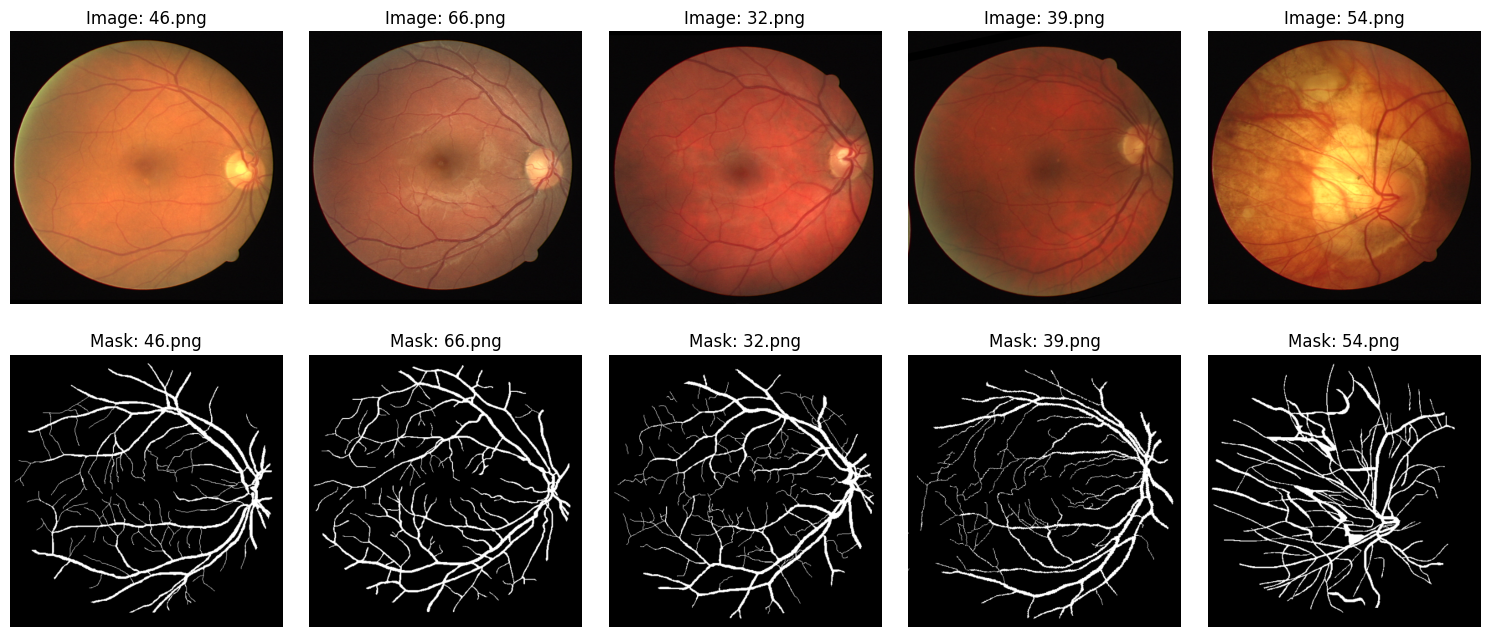


Test Images and Masks:


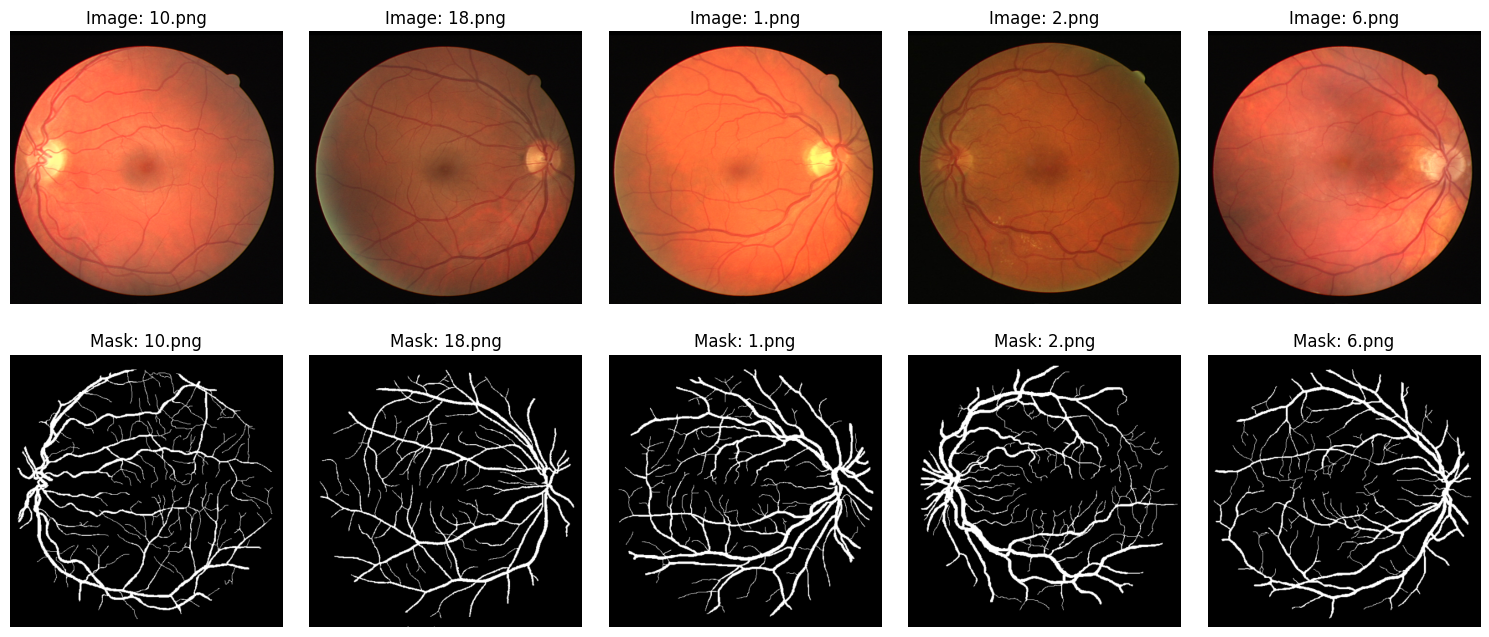

In [ ]:
# Function to display 5 random images and masks
def display_images(img_dir, mask_dir):

    img_filenames = [f for f in os.listdir(img_dir) if f.endswith('.png')]

    # Randomly selecting 5 images
    random_images = random.sample(img_filenames, min(5, len(img_filenames)))
    # Creating a figure to display the images
    plt.figure(figsize=(15, 10))

    # Looping through the selected images and displaying them
    for i, img_filenames in enumerate(random_images):
        # Opening the image using OpenCV
        img_path = os.path.join(img_dir, img_filenames)
        img = cv2.imread(img_path)

        # Converting BGR to RGB (OpenCV loads images in BGR format)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Opening the mask using OpenCV
        mask_path = os.path.join(mask_dir, img_filenames)
        mask = cv2.imread(mask_path)

        # Check if the image and mask were loaded successfully
        if img is None:
            print(f"Error: Could not load image at {img_path}")
            continue
        if mask is None:
            print(f"Error: Could not load mask at {mask_path}")
            continue

        # Converting BGR to RGB (OpenCV loads images in BGR format)
        mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

        # Displaying the image
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns for images
        plt.imshow(img_rgb)
        plt.title(f'Image: {img_filenames}')
        plt.axis('off')

        # Displaying the mask
        plt.subplot(2, 5, i + 6)  # 2 rows, 5 columns for masks
        plt.imshow(mask_rgb)
        plt.title(f'Mask: {img_filenames}')
        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=-0.5)
    plt.show()


print('Training Images and Masks:')
display_images(train_image_folder, train_mask_folder)

print('\nTest Images and Masks:')
display_images(test_image_folder, test_mask_folder)


Training Images:
Image: 12.png, Height: 512, Width: 512, Channels: 3
Image: 29.png, Height: 512, Width: 512, Channels: 3
Image: 50.png, Height: 512, Width: 512, Channels: 3
Image: 27.png, Height: 512, Width: 512, Channels: 3
Image: 35.png, Height: 512, Width: 512, Channels: 3
Image: 40.png, Height: 512, Width: 512, Channels: 3
Image: 26.png, Height: 512, Width: 512, Channels: 3
Image: 18.png, Height: 512, Width: 512, Channels: 3
Image: 48.png, Height: 512, Width: 512, Channels: 3
Image: 10.png, Height: 512, Width: 512, Channels: 3
Image: 43.png, Height: 512, Width: 512, Channels: 3
Image: 17.png, Height: 512, Width: 512, Channels: 3
Image: 42.png, Height: 512, Width: 512, Channels: 3
Image: 38.png, Height: 512, Width: 512, Channels: 3
Image: 20.png, Height: 512, Width: 512, Channels: 3
Image: 14.png, Height: 512, Width: 512, Channels: 3
Image: 23.png, Height: 512, Width: 512, Channels: 3
Image: 3.png, Height: 512, Width: 512, Channels: 3
Image: 52.png, Height: 512, Width: 512, Channels

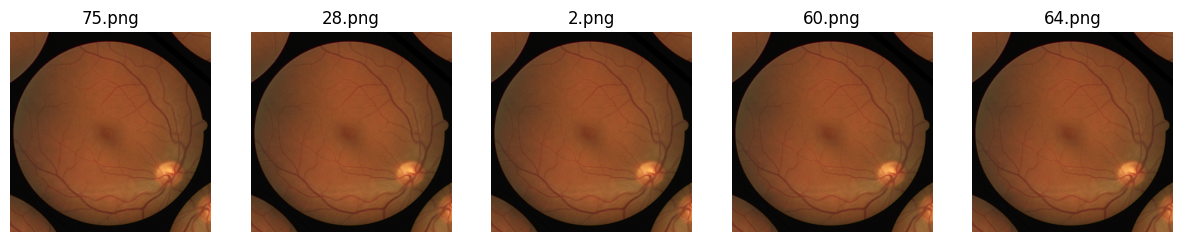


Training Masks:
Image: 19.png, Height: 512, Width: 512, Channels: 3
Image: 60.png, Height: 512, Width: 512, Channels: 3
Image: 7.png, Height: 512, Width: 512, Channels: 3
Image: 65.png, Height: 512, Width: 512, Channels: 3
Image: 64.png, Height: 512, Width: 512, Channels: 3
Image: 1.png, Height: 512, Width: 512, Channels: 3
Image: 56.png, Height: 512, Width: 512, Channels: 3
Image: 79.png, Height: 512, Width: 512, Channels: 3
Image: 15.png, Height: 512, Width: 512, Channels: 3
Image: 53.png, Height: 512, Width: 512, Channels: 3
Image: 8.png, Height: 512, Width: 512, Channels: 3
Image: 44.png, Height: 512, Width: 512, Channels: 3
Image: 67.png, Height: 512, Width: 512, Channels: 3
Image: 39.png, Height: 512, Width: 512, Channels: 3
Image: 24.png, Height: 512, Width: 512, Channels: 3
Image: 11.png, Height: 512, Width: 512, Channels: 3
Image: 5.png, Height: 512, Width: 512, Channels: 3
Image: 70.png, Height: 512, Width: 512, Channels: 3
Image: 6.png, Height: 512, Width: 512, Channels: 3


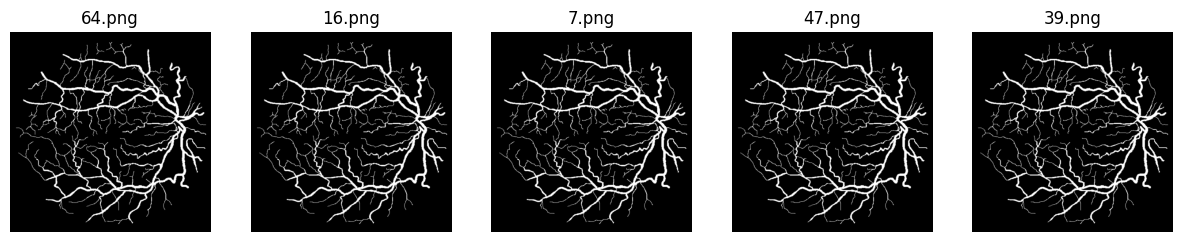

Test Images:
Image: 3.png, Height: 512, Width: 512, Channels: 3
Image: 6.png, Height: 512, Width: 512, Channels: 3
Image: 14.png, Height: 512, Width: 512, Channels: 3
Image: 2.png, Height: 512, Width: 512, Channels: 3
Image: 15.png, Height: 512, Width: 512, Channels: 3
Image: 0.png, Height: 512, Width: 512, Channels: 3
Image: 10.png, Height: 512, Width: 512, Channels: 3
Image: 12.png, Height: 512, Width: 512, Channels: 3
Image: 19.png, Height: 512, Width: 512, Channels: 3
Image: 7.png, Height: 512, Width: 512, Channels: 3
Image: 17.png, Height: 512, Width: 512, Channels: 3
Image: 11.png, Height: 512, Width: 512, Channels: 3
Image: 1.png, Height: 512, Width: 512, Channels: 3
Image: 18.png, Height: 512, Width: 512, Channels: 3
Image: 16.png, Height: 512, Width: 512, Channels: 3
Image: 13.png, Height: 512, Width: 512, Channels: 3
Image: 5.png, Height: 512, Width: 512, Channels: 3
Image: 8.png, Height: 512, Width: 512, Channels: 3
Image: 4.png, Height: 512, Width: 512, Channels: 3
Image: 9

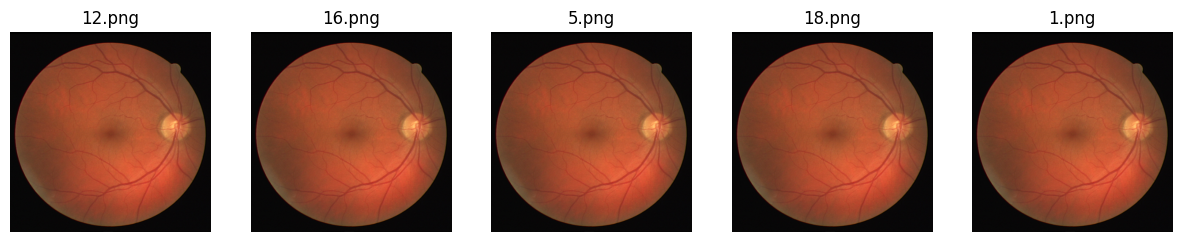


Test Masks:
Image: 3.png, Height: 512, Width: 512, Channels: 3
Image: 6.png, Height: 512, Width: 512, Channels: 3
Image: 14.png, Height: 512, Width: 512, Channels: 3
Image: 2.png, Height: 512, Width: 512, Channels: 3
Image: 15.png, Height: 512, Width: 512, Channels: 3
Image: 0.png, Height: 512, Width: 512, Channels: 3
Image: 10.png, Height: 512, Width: 512, Channels: 3
Image: 12.png, Height: 512, Width: 512, Channels: 3
Image: 19.png, Height: 512, Width: 512, Channels: 3
Image: 7.png, Height: 512, Width: 512, Channels: 3
Image: 17.png, Height: 512, Width: 512, Channels: 3
Image: 11.png, Height: 512, Width: 512, Channels: 3
Image: 1.png, Height: 512, Width: 512, Channels: 3
Image: 18.png, Height: 512, Width: 512, Channels: 3
Image: 16.png, Height: 512, Width: 512, Channels: 3
Image: 13.png, Height: 512, Width: 512, Channels: 3
Image: 5.png, Height: 512, Width: 512, Channels: 3
Image: 8.png, Height: 512, Width: 512, Channels: 3
Image: 4.png, Height: 512, Width: 512, Channels: 3
Image: 9

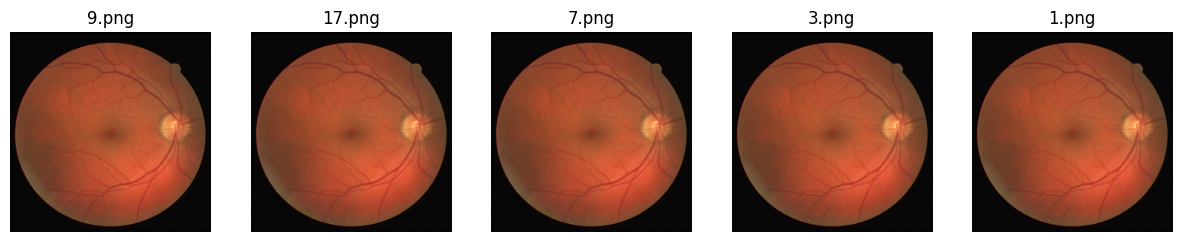

In [ ]:
# Function to print the dimensions of the data samples
def load_images(dir):
    img_filenames = [f for f in os.listdir(dir) if f.endswith('.png')]


    for filename in img_filenames:
        img_path = os.path.join(dir, filename)
        img = cv2.imread(img_path)


        # Getting the dimensions of the image
        height, width, channels = img.shape

        print(f'Image: {filename}, Height: {height}, Width: {width}, Channels: {channels}')

    # Randomly selecting 5 images
    random_images = random.sample(img_filenames, min(5, len(img_filenames)))
    # Creating a figure to display the images
    plt.figure(figsize=(15, 10))

    # Looping through the selected images and displaying them
    for i, img_filenames in enumerate(random_images):
        # Opening the image using OpenCV
        img_path = os.path.join(dir, filename)
        img = cv2.imread(img_path)

        # Converting BGR to RGB (OpenCV loads images in BGR format)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Displaying the image
        plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
        plt.imshow(img_rgb)
        plt.title(img_filenames)
        plt.axis('off')  # Turning off axis numbers and ticks

    plt.show()


print('Training Images:')
load_images(train_image_folder)
print('\nTraining Masks:')
load_images(train_mask_folder)
print('Test Images:')
load_images(test_image_folder)
print('\nTest Masks:')
load_images(test_image_folder)

# **Data Preprocessing**

In [ ]:
# Function to apply CLAHE to improve contrast and reduce noise
def apply_clahe_rgb(image):
    channels = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_channels = [clahe.apply(channel) for channel in channels]
    return cv2.merge(equalized_channels)

# Functions to apply data augmentation
def random_rotation(image, mask, angle_range=(0, 15), target_size=(512, 512)):
    angle = random.uniform(angle_range[0], angle_range[1])
    height, width = image.shape[:2]
    diagonal = int(np.sqrt(height**2 + width**2))
    pad_y, pad_x = (diagonal - height) // 2, (diagonal - width) // 2

    padded_image = cv2.copyMakeBorder(image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_REFLECT)
    padded_mask = cv2.copyMakeBorder(mask, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_REFLECT)

    rotation_matrix = cv2.getRotationMatrix2D((diagonal // 2, diagonal // 2), angle, 1)
    rotated_image = cv2.warpAffine(padded_image, rotation_matrix, (diagonal, diagonal))
    rotated_mask = cv2.warpAffine(padded_mask, rotation_matrix, (diagonal, diagonal))

    start_x, start_y = (rotated_image.shape[1] - target_size[1]) // 2, (rotated_image.shape[0] - target_size[0]) // 2
    cropped_image = rotated_image[start_y:start_y + target_size[0], start_x:start_x + target_size[1]]
    cropped_mask = rotated_mask[start_y:start_y + target_size[0], start_x:start_x + target_size[1]]

    return cropped_image, cropped_mask

def random_flip(image, mask):
    if random.random() < 0.5:
        image = cv2.flip(image, 1)  # Horizontal flip
        mask = cv2.flip(mask, 1)
    return image, mask

def load_and_augment_images(image_folder, mask_folder, output_folder, apply_clahe=True, apply_hist_eq=True, augment=True, target_size=(512, 512), augmentation_rounds=4):

    processed_images_dir = Path(output_folder) / "processed_images"
    processed_masks_dir = Path(output_folder) / "processed_masks"
    aug_images_dir = Path(output_folder) / "aug_images"
    aug_masks_dir = Path(output_folder) / "aug_masks"
    processed_images_dir.mkdir(parents=True, exist_ok=True)
    processed_masks_dir.mkdir(parents=True, exist_ok=True)
    aug_images_dir.mkdir(parents=True, exist_ok=True)
    aug_masks_dir.mkdir(parents=True, exist_ok=True)

    image_paths = sorted(list(Path(image_folder).glob("*.png")))  # Adjust if files are not .png
    mask_paths = sorted(list(Path(mask_folder).glob("*.png")))

    for i, (img_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        image = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

        if image.shape[:2] != target_size:
            image = cv2.resize(image, target_size)
            mask = cv2.resize(mask, target_size)

        # Applying Histogram Equalization
        if apply_hist_eq:
            image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
            image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
            image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

        if apply_clahe:
            image = apply_clahe_rgb(image)

        # Saving original image and mask
        cv2.imwrite(str(processed_images_dir / f"{i}.png"), image)
        cv2.imwrite(str(processed_masks_dir / f"{i}.png"), mask)

        # Generating augmented data samples
        for j in range(augmentation_rounds):
            aug_image, aug_mask = random_flip(image, mask)
            aug_image, aug_mask = random_rotation(aug_image, aug_mask, target_size=target_size)

            # Saving augmented image and mask
            cv2.imwrite(str(aug_images_dir / f"{i}_aug_{j}.png"), aug_image)
            cv2.imwrite(str(aug_masks_dir / f"{i}_aug_{j}.png"), aug_mask)



In [ ]:
processed_training_data_folder = '/content/drive/MyDrive/Data/processed_training_data'
processed_test_data_folder = '/content/drive/MyDrive/Data/processed_test_data'

# Loading and preprocessing the training images and masks
load_and_augment_images(train_image_folder, train_mask_folder, processed_training_data_folder, apply_clahe=True, apply_hist_eq=True, augment=True, target_size=(512, 512), augmentation_rounds=4)

# Loading and preprocessing the test images and masks (without augmentation)
load_and_augment_images(test_image_folder, test_mask_folder, processed_test_data_folder, apply_clahe=True, apply_hist_eq=True, augment=False, target_size=(512, 512), augmentation_rounds=0)

Processed Training Images and Masks:


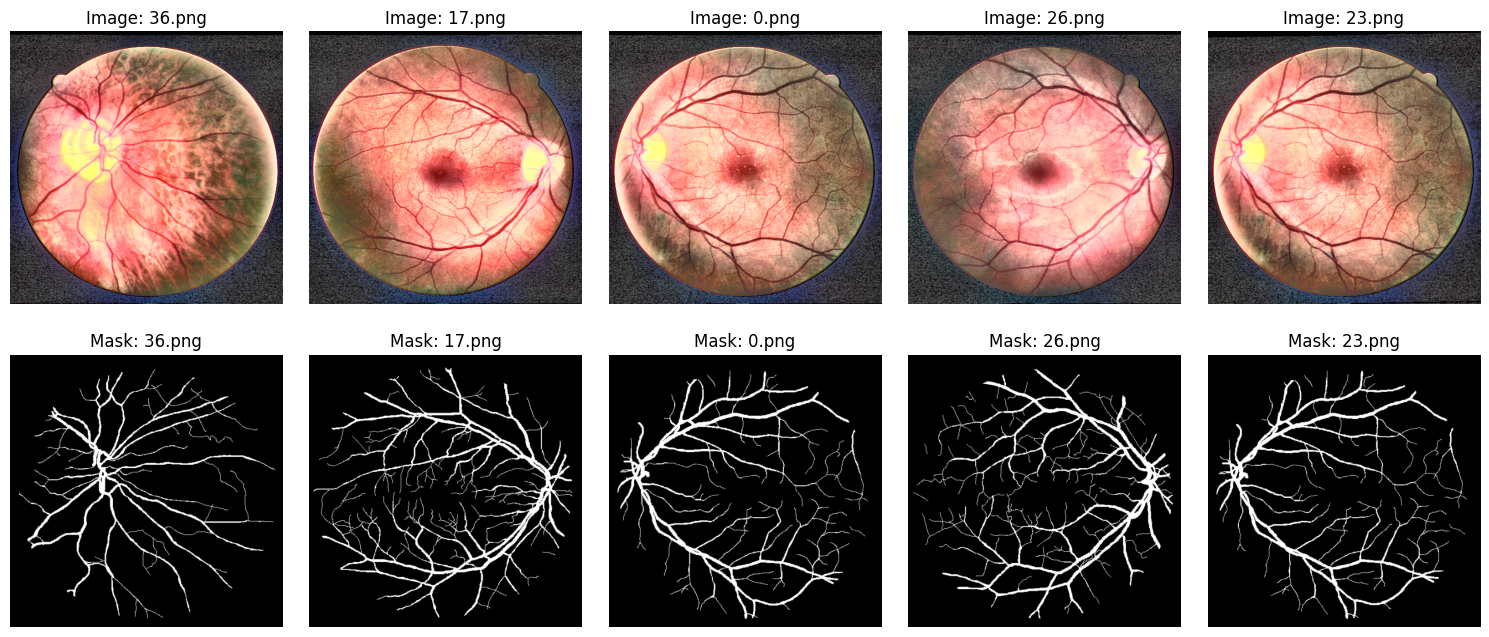

In [ ]:
# Calling the display_images function to display 5 random processed images and masks
print('Processed Training Images and Masks:')
display_images('/content/drive/MyDrive/Data/processed_training_data/processed_images', '/content/drive/MyDrive/Data/processed_training_data/processed_masks')



Training Images:
Image: 0_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 0_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 0_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 0_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 4_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 4_aug_1

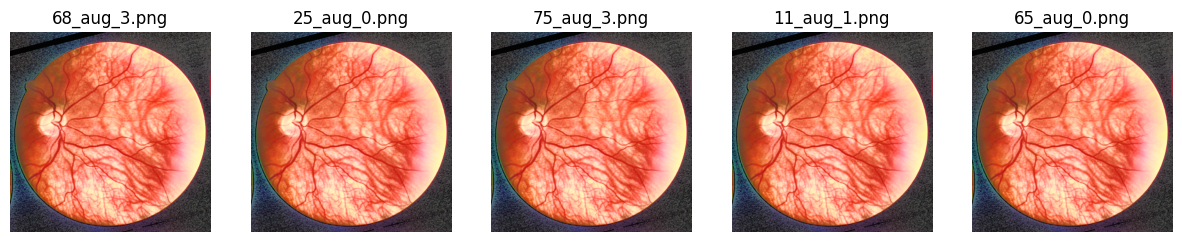


Training Masks:
Image: 0_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 0_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 0_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 0_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 1_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 2_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_1.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_2.png, Height: 512, Width: 512, Channels: 3
Image: 3_aug_3.png, Height: 512, Width: 512, Channels: 3
Image: 4_aug_0.png, Height: 512, Width: 512, Channels: 3
Image: 4_aug_1

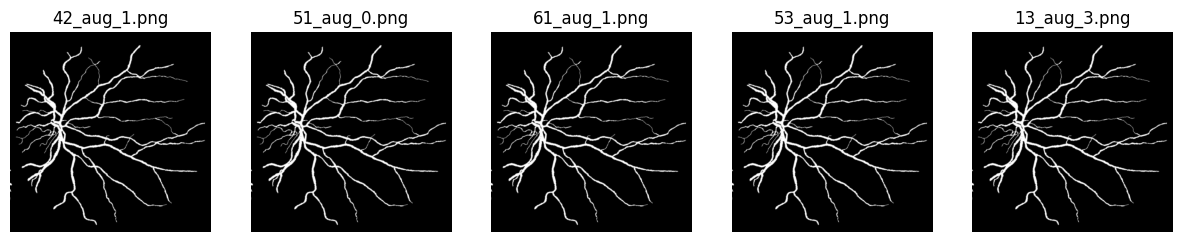

In [ ]:
# Function to print the dimensions of the augmented data samples
print('Training Images:')
load_images('/content/drive/MyDrive/Data/processed_training_data/aug_images')
print('\nTraining Masks:')
load_images('/content/drive/MyDrive/Data/processed_training_data/aug_masks')




# **Loading Preprocessed Data**

In [4]:
# Function to load, normalize and store final train and test image datasets in an array
def load_images(dir):
    # Storing images
    images = []

    img_filenames = [f for f in os.listdir(dir) if f.endswith('.png')]

    for filename in img_filenames:
        # Opening the image using OpenCV
        img_path = os.path.join(dir, filename)
        img = cv2.imread(img_path)

        img = img / 255.0   # Normalizing images

        images.append(img)

    images = np.array(images)

    return images


# Function to load, binarize and store final train and test mask datasets in an array
def load_masks(dir):
    # Storing masks
    masks = []
    img_filenames = [f for f in os.listdir(dir) if f.endswith('.png')]

    for filename in img_filenames:
        # Opening the image using OpenCV
        img_path = os.path.join(dir, filename)
        mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        mask = mask / 255.0  # Normalizing mask to 0 and 1

        mask = np.expand_dims(mask, axis=-1)  # Adding a channel dimension
        masks.append(mask)

    masks = np.array(masks)

    return masks

train_image = load_images('/content/drive/MyDrive/Data/processed_training_data/aug_images')
train_mask = load_masks('/content/drive/MyDrive/Data/processed_training_data/aug_masks')
test_image = load_images('/content/drive/MyDrive/Data/processed_test_data/processed_images')
test_mask = load_masks('/content/drive/MyDrive/Data/processed_test_data/processed_masks')

print(train_image.shape)
print(train_mask.shape)
print(test_image.shape)
print(test_mask.shape)


(320, 512, 512, 3)
(320, 512, 512, 1)
(20, 512, 512, 3)
(20, 512, 512, 1)


In [5]:
# Splitting the training dataset
X_train, X_val, y_train, y_val = train_test_split(train_image, train_mask, test_size=0.2, random_state=42)

X_test, y_test = (test_image, test_mask)

print(f'Training samples: {len(X_train)}')
print(f'Validation samples: {len(X_val)}')
print(f'Test samples: {len(X_test)}')


Training samples: 256
Validation samples: 64
Test samples: 20


# **Functions to test the models**

In [6]:
# Function to print Timestamp
def timestamp():
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))

# Function to compute Dice Score
def dice_score(y_true, y_pred, smooth=1):
    # Cast y_true to float32
    y_true = tf.cast(y_true, tf.float32)
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

# Function to compute Intersection over Union (IoU)
def iou_score(y_true, y_pred, smooth=1):
    # Cast y_true to float32
    y_true = tf.cast(y_true, tf.float32)
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# Function to compute combined Binary Cross-entropy and Dice loss
def dice_bce_loss(y_true, y_pred):
    bce = BinaryCrossentropy()(y_true, y_pred)
    dice = Dice()(y_true, y_pred)
    total_loss = bce + dice
    return total_loss

# Function to test the models
def test_model(model, images, masks, model_name):
    predictions = model.predict(images)
    pred_binary = tf.round(predictions)  # Binarizing predictions

    # Storing predictions in a NumPy array with model name
    np.save(f"predictions_{model_name}.npy", pred_binary)

    dice_scores = []
    iou_scores = []

    for pred, true_mask in zip(pred_binary, masks):
        dice = dice_score(true_mask, pred).numpy()
        iou = iou_score(true_mask, pred).numpy()
        dice_scores.append(dice)
        iou_scores.append(iou)

    mean_dice = np.mean(dice_scores)
    mean_iou = np.mean(iou_scores)

    print("Model: ", model_name)
    print(f"Mean Dice Score on Test Set: {mean_dice:.4f}")
    print(f"Mean IoU Score on Test Set: {mean_iou:.4f}")


# **U-Net 2 Layers Models Without Normalization**

In [ ]:
# U-Net 2 Layers without Normalization
def conv_block(inputs, num_filters):
    x = layers.Conv2D(num_filters, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.Conv2D(num_filters, (3, 3), padding="same", activation="relu")(x)
    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = layers.concatenate([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet_2layer_H1(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)

    # Bottleneck
    b1 = conv_block(p2, 256)

    # Decoder
    d1 = decoder_block(b1, s2, 128)
    d2 = decoder_block(d1, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs, outputs, name="U-Net-2Layers-without-Normalization-H1")
    return model

def build_unet_2layer_H2(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)

    # Bottleneck
    b1 = conv_block(p2, 256)

    # Decoder
    d1 = decoder_block(b1, s2, 128)
    d2 = decoder_block(d1, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs, outputs, name="U-Net-2Layers-without-Normalization-H2")
    return model

def build_unet_2layer_H3(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)

    # Bottleneck
    b1 = conv_block(p2, 256)

    # Decoder
    d1 = decoder_block(b1, s2, 128)
    d2 = decoder_block(d1, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs, outputs, name="U-Net-2Layers-without-Normalization-H3")
    return model

# Defining the input shape
input_shape = (512, 512, 3)  # RGB images


In [ ]:
# U-Net 2 Layers without normalization Hyperparameter 1 (H1)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 30, Batch Size = 5, Loss Function - Binary Cross-entropy

# Building the model
model = build_unet_2layer_H1(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=5, epochs=30, verbose=1)

# Saving the model weights
model.save_weights('unet_2layer_without_normalization_H1.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_2layer_without_normalization_H1')
timestamp()

Model: "U-Net-2Layers-without-Normalization"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 512, 512, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 256, 256, 64)   │              0 │ conv2d_12[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 128, 128, 128)  │              0 │ conv2d_14[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 128, 128, 256)  │        590,080 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_2        │ (None, 256, 256, 128)  │        131,200 │ conv2d_16[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 256, 256, 256)  │              0 │ conv2d_transpose_2[0]… │
│ (Concatenate)             │                        │                │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 256, 256, 128)  │        295,040 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ conv2d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_3        │ (None, 512, 512, 64)   │         32,832 │ conv2d_18[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 512, 512, 128)  │              0 │ conv2d_transpose_3[0]… │
│ (Concatenate)             │                        │                │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 512, 512, 64)   │         73,792 │ concatenate_3[0][0]    │
├──────────────────────

 Total params: 1,862,849 (7.11 MB)

 Trainable params: 1,862,849 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 53s 863ms/step - dice_score: 0.1463 - iou_score: 0.0789 - loss: 0.6581 - val_dice_score: 0.1438 - val_iou_score: 0.0775 - val_loss: 0.6065
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 736ms/step - dice_score: 0.1379 - iou_score: 0.0741 - loss: 0.5652 - val_dice_score: 0.0712 - val_iou_score: 0.0369 - val_loss: 0.3914
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 691ms/step - dice_score: 0.0638 - iou_score: 0.0329 - loss: 0.3849 - val_dice_score: 0.0686 - val_iou_score: 0.0355 - val_loss: 0.3801
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 695ms/step - dice_score: 0.0700 - iou_score: 0.0363 - loss: 0.3687 - val_dice_score: 0.0753 - val_iou_score: 0.0392 - val_loss: 0.3595
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 699ms/step - dice_score: 0.0764 - iou_score: 0.0397 - loss: 0.3473 - val_dice_score: 0.0965 - val_iou_score: 0.0507 - val_loss: 0.3133
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 43s 743ms/step - dice_score: 0.1041 - iou_score: 0.0549 - loss: 0.3004 - val_

In [ ]:
# U-Net 2 Layers without normalization Hyperparameter 2 (H2)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 30, Batch Size = 5, Loss Function - Dice Loss

# Building the model
model = build_unet_2layer_H2(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=Dice(), metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=5, epochs=30, verbose=1)

# Saving the model weights
model.save_weights('unet_2layer_without_normalization_H2.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_2layer_without_normalization_H2')
timestamp()

Model: "U-Net-2Layers-without-Normalization-H2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 512, 512, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 256, 256, 64)   │              0 │ conv2d_12[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 128, 128, 128)  │              0 │ conv2d_14[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 128, 128, 256)  │        590,080 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_2        │ (None, 256, 256, 128)  │        131,200 │ conv2d_16[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 256, 256, 256)  │              0 │ conv2d_transpose_2[0]… │
│ (Concatenate)             │                        │                │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 256, 256, 128)  │        295,040 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ conv2d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_3        │ (None, 512, 512, 64)   │         32,832 │ conv2d_18[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 512, 512, 128)  │              0 │ conv2d_transpose_3[0]… │
│ (Concatenate)             │                        │                │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 512, 512, 64)   │         73,792 │ concatenate_3[0][0]    │
├──────────────────────

 Total params: 1,862,849 (7.11 MB)

 Trainable params: 1,862,849 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 764ms/step - dice_score: 0.1482 - iou_score: 0.0800 - loss: 0.8518 - val_dice_score: 0.1531 - val_iou_score: 0.0829 - val_loss: 0.8467
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 76s 713ms/step - dice_score: 0.1550 - iou_score: 0.0840 - loss: 0.8450 - val_dice_score: 0.1626 - val_iou_score: 0.0885 - val_loss: 0.8372
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 660ms/step - dice_score: 0.1663 - iou_score: 0.0908 - loss: 0.8337 - val_dice_score: 0.1764 - val_iou_score: 0.0968 - val_loss: 0.8233
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 715ms/step - dice_score: 0.1747 - iou_score: 0.0958 - loss: 0.8253 - val_dice_score: 0.1871 - val_iou_score: 0.1033 - val_loss: 0.8126
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 665ms/step - dice_score: 0.1849 - iou_score: 0.1019 - loss: 0.8151 - val_dice_score: 0.1902 - val_iou_score: 0.1051 - val_loss: 0.8095
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 666ms/step - dice_score: 0.1907 - iou_score: 0.1055 - loss: 0.8093 - val_

In [ ]:
# U-Net 2 Layers without normalization Hyperparameter 3 (H3)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 30, Batch Size = 5, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_2layer_H3(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=5, epochs=30, verbose=1)

# Saving the model weights
model.save_weights('unet_2layer_without_normalization_H3.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_2layer_without_normalization_H3')
timestamp()

Model: "U-Net-2Layers-without-Normalization-H3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 256)  │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 256, 256, 128)  │        131,200 │ conv2d_5[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 256)  │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 256, 256, 128)  │        295,040 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 512, 512, 64)   │         32,832 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512, 512, 128)  │              0 │ conv2d_transpose_1[0]… │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 512, 512, 64)   │         73,792 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)    

 Total params: 1,862,849 (7.11 MB)

 Trainable params: 1,862,849 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - dice_score: 0.1487 - iou_score: 0.0804 - loss: 1.5268 - val_dice_score: 0.1475 - val_iou_score: 0.0796 - val_loss: 1.4956
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 67s 701ms/step - dice_score: 0.1438 - iou_score: 0.0775 - loss: 1.4748 - val_dice_score: 0.1249 - val_iou_score: 0.0666 - val_loss: 1.3414
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 664ms/step - dice_score: 0.1035 - iou_score: 0.0547 - loss: 1.3053 - val_dice_score: 0.0937 - val_iou_score: 0.0492 - val_loss: 1.2813
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 661ms/step - dice_score: 0.0941 - iou_score: 0.0494 - loss: 1.2719 - val_dice_score: 0.1001 - val_iou_score: 0.0527 - val_loss: 1.2486
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 668ms/step - dice_score: 0.1080 - iou_score: 0.0571 - loss: 1.2324 - val_dice_score: 0.1457 - val_iou_score: 0.0786 - val_loss: 1.1530
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - dice_score: 0.1502 - iou_score: 0.0813 - loss: 1.1430 - val_di

# **U-Net 2 Layers Models with Normalization**

In [7]:
# U-Net 2 Layers with Normalization
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet_2layer_N_H1(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)

    # Bottleneck
    b1 = conv_block(p2, 256)

    # Decoder
    d1 = decoder_block(b1, s2, 128)
    d2 = decoder_block(d1, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs, outputs, name="U-Net-2Layers-with-Normalization-H1")
    return model

def build_unet_2layer_N_H2(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)

    # Bottleneck
    b1 = conv_block(p2, 256)

    # Decoder
    d1 = decoder_block(b1, s2, 128)
    d2 = decoder_block(d1, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs, outputs, name="U-Net-2Layers-with-Normalization-H2")
    return model

def build_unet_2layer_N_H3(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)

    # Bottleneck
    b1 = conv_block(p2, 256)

    # Decoder
    d1 = decoder_block(b1, s2, 128)
    d2 = decoder_block(d1, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs, outputs, name="U-Net-2Layers-with-Normalization-H3")
    return model


# Defining the input shape
input_shape = (512, 512, 3)  # RGB images


In [ ]:
# U-Net 2 Layers with normalization Hyperparameter 1 (H1)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 30, Batch Size = 5, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_2layer_N_H1(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=5, epochs=30, verbose=1)

# Saving the model weights
model.save_weights('unet_2layer_with_normalization_H1.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_2layer_with_normalization_H1')
timestamp()

Model: "U-Net-2Layers-with-Normalization-H1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 512, 512, 64)   │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 512, 512, 64)   │            256 │ conv2d_28[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 512, 512, 64)   │            256 │ conv2d_29[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 256, 256, 64)   │              0 │ activation_7[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 256, 256, 128)  │            512 │ conv2d_30[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 256, 256, 128)  │            512 │ conv2d_31[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 128, 128, 128)  │              0 │ activation_9[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_7[0][0]  │
├──────────────────────

 Total params: 1,868,737 (7.13 MB)

 Trainable params: 1,865,793 (7.12 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - dice_score: 0.1751 - iou_score: 0.0961 - loss: 1.7702 - val_dice_score: 0.1504 - val_iou_score: 0.0813 - val_loss: 1.5579
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 37s 717ms/step - dice_score: 0.2322 - iou_score: 0.1314 - loss: 1.4818 - val_dice_score: 0.1481 - val_iou_score: 0.0800 - val_loss: 1.5225
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 777ms/step - dice_score: 0.2670 - iou_score: 0.1542 - loss: 1.2491 - val_dice_score: 0.1439 - val_iou_score: 0.0775 - val_loss: 1.4248
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 772ms/step - dice_score: 0.3042 - iou_score: 0.1795 - loss: 1.1075 - val_dice_score: 0.1376 - val_iou_score: 0.0739 - val_loss: 1.3229
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 729ms/step - dice_score: 0.3300 - iou_score: 0.1978 - loss: 1.0250 - val_dice_score: 0.1331 - val_iou_score: 0.0713 - val_loss: 1.2560
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 727ms/step - dice_score: 0.3580 - iou_score: 0.2181 - loss: 0.9536 - val_dic

In [ ]:
# U-Net 2 Layers with normalization Hyperparameter 2 (H2)
# Optimizer - Adam, Learning Rate (LR) - 0.000001, Epochs - 50, Batch Size = 6, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_2layer_N_H2(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=6, epochs=50, verbose=1)

# Saving the model weights
model.save_weights('unet_2layer_with_normalization_H2.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_2layer_with_normalization_H2')
timestamp()

Model: "U-Net-2Layers-with-Normalization-H2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512, 512, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 512, 512, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512, 512, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256, 256, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256, 256, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 1,868,737 (7.13 MB)

 Trainable params: 1,865,793 (7.12 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - dice_score: 0.1455 - iou_score: 0.0785 - loss: 1.4460 - val_dice_score: 0.1503 - val_iou_score: 0.0813 - val_loss: 1.5470
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 940ms/step - dice_score: 0.1573 - iou_score: 0.0854 - loss: 1.4167 - val_dice_score: 0.1506 - val_iou_score: 0.0814 - val_loss: 1.5295
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 998ms/step - dice_score: 0.1653 - iou_score: 0.0901 - loss: 1.3939 - val_dice_score: 0.1510 - val_iou_score: 0.0817 - val_loss: 1.4978
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 942ms/step - dice_score: 0.1772 - iou_score: 0.0972 - loss: 1.3695 - val_dice_score: 0.1516 - val_iou_score: 0.0820 - val_loss: 1.4615
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 940ms/step - dice_score: 0.1890 - iou_score: 0.1044 - loss: 1.3469 - val_dice_score: 0.1518 - val_iou_score: 0.0822 - val_loss: 1.4234
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 940ms/step - dice_score: 0.1974 - iou_score: 0.1096 - loss: 1.3277 - val_di

In [8]:
# U-Net 2 Layers with normalization Hyperparameter 3 (H3)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 50, Batch Size = 6, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_2layer_N_H3(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=6, epochs=50, verbose=1)

# Saving the model weights
model.save_weights('unet_2layer_with_normalization_H3.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_2layer_with_normalization_H3')
timestamp()

Model: "U-Net-2Layers-with-Normalization-H3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512, 512, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 512, 512, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512, 512, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256, 256, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256, 256, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 1,868,737 (7.13 MB)

 Trainable params: 1,865,793 (7.12 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - dice_score: 0.1438 - iou_score: 0.0777 - loss: 1.4246 - val_dice_score: 0.1476 - val_iou_score: 0.0797 - val_loss: 1.4935
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 876ms/step - dice_score: 0.2442 - iou_score: 0.1392 - loss: 1.2167 - val_dice_score: 0.1429 - val_iou_score: 0.0769 - val_loss: 1.4134
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 879ms/step - dice_score: 0.2977 - iou_score: 0.1750 - loss: 1.1036 - val_dice_score: 0.1375 - val_iou_score: 0.0738 - val_loss: 1.3357
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 935ms/step - dice_score: 0.3399 - iou_score: 0.2049 - loss: 1.0059 - val_dice_score: 0.1304 - val_iou_score: 0.0698 - val_loss: 1.2634
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 935ms/step - dice_score: 0.3820 - iou_score: 0.2362 - loss: 0.9161 - val_dice_score: 0.1244 - val_iou_score: 0.0663 - val_loss: 1.2205
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 934ms/step - dice_score: 0.4087 - iou_score: 0.2569 - loss: 0.8572 - val_di

# **U-Net 3 Layers Without Normalization**

In [ ]:
# U-Net 3 Layers without Normalization
def conv_block(inputs, num_filters):
    x = layers.Conv2D(num_filters, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.Conv2D(num_filters, (3, 3), padding="same", activation="relu")(x)
    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = layers.concatenate([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet_3layer_H1(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)

    # Bottleneck
    b1 = conv_block(p3, 512)

    # Decoder
    d1 = decoder_block(b1, s3, 256)
    d2 = decoder_block(d1, s2, 128)
    d3 = decoder_block(d2, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="U-Net-3Layers-without-Normalization-H1")
    return model

def build_unet_3layer_H2(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)

    # Bottleneck
    b1 = conv_block(p3, 512)

    # Decoder
    d1 = decoder_block(b1, s3, 256)
    d2 = decoder_block(d1, s2, 128)
    d3 = decoder_block(d2, s1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="U-Net-3Layers-without-Normalization-H2")
    return model

# Defining the input shape
input_shape = (512, 512, 3)  # RGB images


In [ ]:
# U-Net 3 Layers without normalization Hyperparameter 1 (H1)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 30, Batch Size = 5, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_3layer_H1(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=5, epochs=30, verbose=1)

# Saving the model weights
model.save_weights('unet_3layer_without_normalization_H1.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_3layer_without_normalization_H1')
timestamp()

Model: "U-Net-3Layers-without-Normalization-H1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 256)  │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 64, 64, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 128, 128, 256)  │        524,544 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 512)  │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 256)  │      1,179,904 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 128, 128, 256)  │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 256, 256, 128)  │        131,200 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)    

 Total params: 7,697,345 (29.36 MB)

 Trainable params: 7,697,345 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - dice_score: 0.1492 - iou_score: 0.0806 - loss: 1.5381 - val_dice_score: 0.1465 - val_iou_score: 0.0791 - val_loss: 1.4791
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 92s 944ms/step - dice_score: 0.1355 - iou_score: 0.0728 - loss: 1.4342 - val_dice_score: 0.0951 - val_iou_score: 0.0499 - val_loss: 1.2999
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 80s 915ms/step - dice_score: 0.0934 - iou_score: 0.0490 - loss: 1.2919 - val_dice_score: 0.0900 - val_iou_score: 0.0471 - val_loss: 1.2767
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 84s 947ms/step - dice_score: 0.0946 - iou_score: 0.0497 - loss: 1.2612 - val_dice_score: 0.1340 - val_iou_score: 0.0719 - val_loss: 1.1640
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 81s 920ms/step - dice_score: 0.1464 - iou_score: 0.0791 - loss: 1.1411 - val_dice_score: 0.1712 - val_iou_score: 0.0936 - val_loss: 1.1069
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 47s 906ms/step - dice_score: 0.1678 - iou_score: 0.0916 - loss: 1.1074 - val_di

In [ ]:
# U-Net 3 Layers without normalization Hyperparameter 2 (H2)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 50, Batch Size = 6, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_3layer_H2(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=6, epochs=50, verbose=1)

# Saving the model weights
model.save_weights('unet_3layer_without_normalization_H2.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_3layer_without_normalization_H2')
timestamp()

Model: "U-Net-3Layers-without-Normalization-H2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 256)  │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 64, 64, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 128, 128, 256)  │        524,544 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 512)  │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 256)  │      1,179,904 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 128, 128, 256)  │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 256, 256, 128)  │        131,200 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)    

 Total params: 7,697,345 (29.36 MB)

 Trainable params: 7,697,345 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - dice_score: 0.1485 - iou_score: 0.0802 - loss: 1.5439 - val_dice_score: 0.1458 - val_iou_score: 0.0786 - val_loss: 1.4913
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - dice_score: 0.1406 - iou_score: 0.0757 - loss: 1.4630 - val_dice_score: 0.0769 - val_iou_score: 0.0400 - val_loss: 1.3164
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - dice_score: 0.0821 - iou_score: 0.0428 - loss: 1.3120 - val_dice_score: 0.0866 - val_iou_score: 0.0453 - val_loss: 1.2951
Epoch 4/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - dice_score: 0.0887 - iou_score: 0.0464 - loss: 1.2830 - val_dice_score: 0.0954 - val_iou_score: 0.0501 - val_loss: 1.2437
Epoch 5/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - dice_score: 0.1089 - iou_score: 0.0577 - loss: 1.2063 - val_dice_score: 0.1663 - val_iou_score: 0.0907 - val_loss: 1.1215
Epoch 6/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - dice_score: 0.1684 - iou_score: 0.0920 - loss: 1.1206 - val_dice_score: 0.170

# **U-Net 3 Layers Models with Normalization**

In [ ]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet_3layer_N_H1(input_shape):
    inputs = Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)

    # Bottleneck
    b1 = conv_block(p3, 512)

    # Decoder
    d1 = decoder_block(b1, s3, 256)
    d2 = decoder_block(d1, s2, 128)
    d3 = decoder_block(d2, s1, 64)

    # Output layer
    outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="U-Net-3Layers-with-Normalization-H1")
    return model

def build_unet_3layer_N_H2(input_shape):
    inputs = Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)

    # Bottleneck
    b1 = conv_block(p3, 512)

    # Decoder
    d1 = decoder_block(b1, s3, 256)
    d2 = decoder_block(d1, s2, 128)
    d3 = decoder_block(d2, s1, 64)

    # Output layer
    outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="U-Net-3Layers-with-Normalization-H2")
    return model

# Defining the input shape
input_shape = (512, 512, 3)  # RGB images

In [ ]:
# U-Net 3 Layers with normalization Hyperparameter 1 (H1)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 30, Batch Size = 5, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_3layer_N_H1(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=5, epochs=30, verbose=1)

# Saving the model weights
model.save_weights('unet_3layer_with_normalization_H1.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_3layer_with_normalization_H1')
timestamp()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 512, 512, 64)   │          1,792 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512, 512, 64)   │            256 │ conv2d_30[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 512, 512, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512, 512, 64)   │            256 │ conv2d_31[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 256, 256, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256, 256, 128)  │            512 │ conv2d_32[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256, 256, 128)  │            512 │ conv2d_33[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 128, 128, 128)  │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_7[0][0]  │
├──────────────────────

 Total params: 7,710,401 (29.41 MB)

 Trainable params: 7,703,873 (29.39 MB)

 Non-trainable params: 6,528 (25.50 KB)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - dice_score: 0.1703 - iou_score: 0.0934 - loss: 1.5963 - val_dice_score: 0.1479 - val_iou_score: 0.0799 - val_loss: 1.4717
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 50s 951ms/step - dice_score: 0.2499 - iou_score: 0.1429 - loss: 1.3522 - val_dice_score: 0.1464 - val_iou_score: 0.0790 - val_loss: 1.4017
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 951ms/step - dice_score: 0.3042 - iou_score: 0.1795 - loss: 1.1292 - val_dice_score: 0.1430 - val_iou_score: 0.0770 - val_loss: 1.3082
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 50s 963ms/step - dice_score: 0.3604 - iou_score: 0.2199 - loss: 0.9719 - val_dice_score: 0.1377 - val_iou_score: 0.0740 - val_loss: 1.2268
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 83s 980ms/step - dice_score: 0.3892 - iou_score: 0.2418 - loss: 0.8977 - val_dice_score: 0.1412 - val_iou_score: 0.0760 - val_loss: 1.1779
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 80s 952ms/step - dice_score: 0.4191 - iou_score: 0.2652 - loss: 0.8368 - val_dic

In [ ]:
# U-Net 3 Layers with normalization Hyperparameter 2 (H2)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 50, Batch Size = 6, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_3layer_N_H2(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=6, epochs=50, verbose=1)

# Saving the model weights
model.save_weights('unet_3layer_with_normalization_H2.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_3layer_with_normalization_H2')
timestamp()

Model: "U-Net-3Layers-with-Normalization-H2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 512, 512, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 512, 512, 64)   │            256 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_12             │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_12[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 512, 512, 64)   │            256 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_13             │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 256, 256, 64)   │              0 │ activation_13[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 256, 256, 128)  │            512 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_14             │ (None, 256, 256, 128)  │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_14[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 256, 256, 128)  │            512 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_15             │ (None, 256, 256, 128)  │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3      

 Total params: 7,710,401 (29.41 MB)

 Trainable params: 7,703,873 (29.39 MB)

 Non-trainable params: 6,528 (25.50 KB)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - dice_score: 0.1839 - iou_score: 0.1015 - loss: 1.4468 - val_dice_score: 0.1506 - val_iou_score: 0.0815 - val_loss: 1.5127
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - dice_score: 0.2527 - iou_score: 0.1447 - loss: 1.2474 - val_dice_score: 0.1489 - val_iou_score: 0.0804 - val_loss: 1.4371
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - dice_score: 0.3025 - iou_score: 0.1783 - loss: 1.0935 - val_dice_score: 0.1443 - val_iou_score: 0.0778 - val_loss: 1.3371
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - dice_score: 0.3505 - iou_score: 0.2125 - loss: 0.9754 - val_dice_score: 0.1378 - val_iou_score: 0.0740 - val_loss: 1.2582
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - dice_score: 0.3876 - iou_score: 0.2405 - loss: 0.8970 - val_dice_score: 0.1302 - val_iou_score: 0.0697 - val_loss: 1.2093
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - dice_score: 0.4172 - iou_score: 0.2636 - loss: 0.8399 - val_dice_score: 0.123

# **U-Net 4 Layers with Normalization**

In [ ]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet_4layer_N_H1(input_shape):
    inputs = Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # Bottleneck
    b1 = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output layer
    outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net-4Layers-H1")
    return model

# Defining the input shape
input_shape = (512, 512, 3)  # RGB images

In [ ]:
# U-Net 4 Layers with normalization Hyperparameter 1 (H1)
# Optimizer - Adam, Learning Rate (LR) - 0.00001, Epochs - 50, Batch Size = 6, Loss Function - BCE + Dice Loss

# Building the model
model = build_unet_4layer_N_H1(input_shape)
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss=dice_bce_loss, metrics=[dice_score, iou_score])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=6, epochs=50, verbose=1)

# Saving the model weights
model.save_weights('unet_4layer_with_normalization_H1.weights.h5')

# Testing the model
test_loss, test_dice_score, test_iou_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Dice Score: {test_dice_score:.4f}")
print(f"Test IoU Score: {test_iou_score:.4f}")

# Evaluating on test set
test_model(model, X_test, y_test, 'unet_4layer_with_normalization_H1')
timestamp()

Model: "U-Net-4Layers-H1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 512, 512, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 512, 512, 64)   │            256 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_22             │ (None, 512, 512, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_22[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 512, 512, 64)   │            256 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_23             │ (None, 512, 512, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 256, 256, 64)   │              0 │ activation_23[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 256, 256, 128)  │            512 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_24             │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_24[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 256, 256, 128)  │            512 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_25             │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5      

 Total params: 31,059,137 (118.48 MB)

 Trainable params: 31,045,441 (118.43 MB)

 Non-trainable params: 13,696 (53.50 KB)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - dice_score: 0.1841 - iou_score: 0.1014 - loss: 1.7204 - val_dice_score: 0.1509 - val_iou_score: 0.0816 - val_loss: 1.5386
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - dice_score: 0.2279 - iou_score: 0.1287 - loss: 1.4534 - val_dice_score: 0.1495 - val_iou_score: 0.0808 - val_loss: 1.4873
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - dice_score: 0.2638 - iou_score: 0.1520 - loss: 1.2111 - val_dice_score: 0.1444 - val_iou_score: 0.0778 - val_loss: 1.3990
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - dice_score: 0.2998 - iou_score: 0.1764 - loss: 1.0823 - val_dice_score: 0.1362 - val_iou_score: 0.0731 - val_loss: 1.3216
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - dice_score: 0.3380 - iou_score: 0.2035 - loss: 0.9821 - val_dice_score: 0.1284 - val_iou_score: 0.0686 - val_loss: 1.2680
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - dice_score: 0.3708 - iou_score: 0.2277 - loss: 0.9187 - val_dice_score: 0.124

# **Model Predictions Demo**

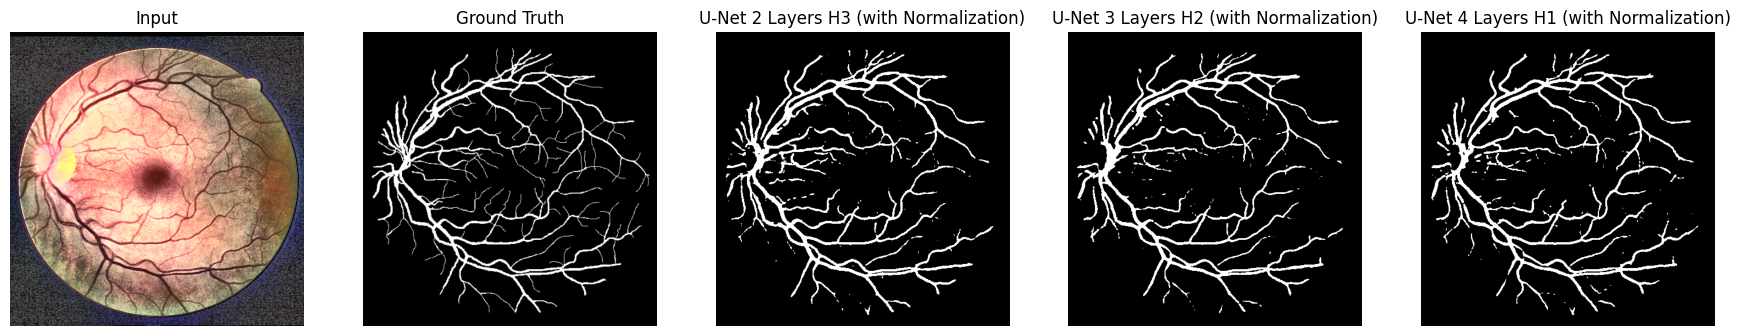

In [ ]:
#unet_2layer_with_normalization_H3
#unet_3layer_with_normalization_H2
#unet_4layer_with_normalization_H1

def visualize_predictions(input_image, ground_truth, prediction_2layer_H3, prediction_3layer_H2, prediction_4layer_H1, titles=["Input", "Ground Truth", "U-Net 2 Layers H3 (with Normalization)", "U-Net 3 Layers H2 (with Normalization)", "U-Net 4 Layers H1 (with Normalization)"]):

  fig, axs = plt.subplots(1, 5, figsize=(22, 5))
  input_image = (input_image * 255).astype(np.uint8)
  axs[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
  axs[0].set_title(titles[0])
  axs[0].axis('off')

  axs[1].imshow(ground_truth, cmap='gray')
  axs[1].set_title(titles[1])
  axs[1].axis('off')

  axs[2].imshow(prediction_2layer_H3, cmap='gray')
  axs[2].set_title(titles[2])
  axs[2].axis('off')

  axs[3].imshow(prediction_3layer_H2, cmap='gray')
  axs[3].set_title(titles[3])
  axs[3].axis('off')

  axs[4].imshow(prediction_4layer_H1, cmap='gray')
  axs[4].set_title(titles[4])
  axs[4].axis('off')

  plt.show()

# Loading predictions
predictions_2layer_H3 = np.load('predictions_unet_2layer_with_normalization_H3.npy')
predictions_3layer_H2 = np.load('predictions_unet_3layer_with_normalization_H2.npy')
predictions_4layer_H1 = np.load('predictions_unet_4layer_with_normalization_H1.npy')

visualize_predictions(X_test[0], y_test[0], predictions_2layer_H3[0], predictions_3layer_H2[0], predictions_4layer_H1[0])  # Using the first prediction from each layer

